# Título do trabalho

Importando bibliotecas e arquivos de dados

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Para Notebooks
init_notebook_mode(connected=True)
import cufflinks as cf
# For offline use
cf.go_offline()

In [112]:
df_geral = pd.read_csv("Geral.csv", delimiter=";")
ano_15 = pd.read_csv("15.csv")
ano_16 = pd.read_csv("16.csv")
ano_17 = pd.read_csv("17.csv")


In [4]:
ano_15.head(3)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204

In [5]:
ano_16.head(3)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137

In [6]:
ano_17.head(3)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   
2  Iceland               3            7.504      7.622030     7.385970   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715

# =================================================== 


# Resumo dos valores  do 2017 

In [7]:
descricao_do_17 = ano_17.describe().transpose()
descricao_do_17.drop("count", axis=1).drop("Happiness.Rank")

mean       std       min       25%  \
Happiness.Score                5.354019  1.131230  2.693000  4.505500   
Whisker.high                   5.452326  1.118542  2.864884  4.608172   
Whisker.low                    5.255713  1.145030  2.521116  4.374955   
Economy..GDP.per.Capita.       0.984718  0.420793  0.000000  0.663371   
Family                         1.188898  0.287263  0.000000  1.042635   
Health..Life.Expectancy.       0.551341  0.237073  0.000000  0.369866   
Freedom                        0.408786  0.149997  0.000000  0.303677   
Generosity                     0.246883  0.134780  0.000000  0.154106   
Trust..Government.Corruption.  0.123120  0.101661  0.000000  0.057271   
Dystopia.Residual              1.850238  0.500028  0.377914  1.591291   

                                    50%       75%       max  
Happiness.Score                5.279000  6.101500  7.537000  
Whisker.high                   5.370032  6.194600  7.622030  
Whisker.low                    5.193152  6.006527  7.479556  
Economy..GDP.per.Capita.       1.064578  1.318027  1.870766  
Family                         1.253918  1.414316  1.610574  
Health..Life.Expectancy.       0.606042  0.723008  0.949492  
Freedom                        0.437454  0.516561  0.658249  
Generosity                     0.231538  0.323762  0.838075  
Trust..Government.Corruption.  0.089848  0.153296  0.464308  
Dystopia.Residual              1.832910  2.144654  3.117485

## Primeiros 50 paises do Ranking Paises agrupados por região(2016)

In [122]:
top50 = ano_16[ano_16["Happiness Rank"]< 50]

groupByRegion = top50.groupby(["Region"]).size().to_frame()

groupByRegion.reset_index(inplace=True)
groupByRegion.iplot(kind='bar',x='Region' , width="2")
groupByRegion.iplot(kind='pie', labels='Region', values=0 , width="2")


# ---------------------------------------------------------------------------------------------------------
# Ver correlação entre os atributos

### Correlação entre posição do ranking  e score de felicidade quase perfeita

In [35]:
ano_17.iplot(kind='scatter',x='Happiness.Rank',y='Happiness.Score',mode='markers',size=4)

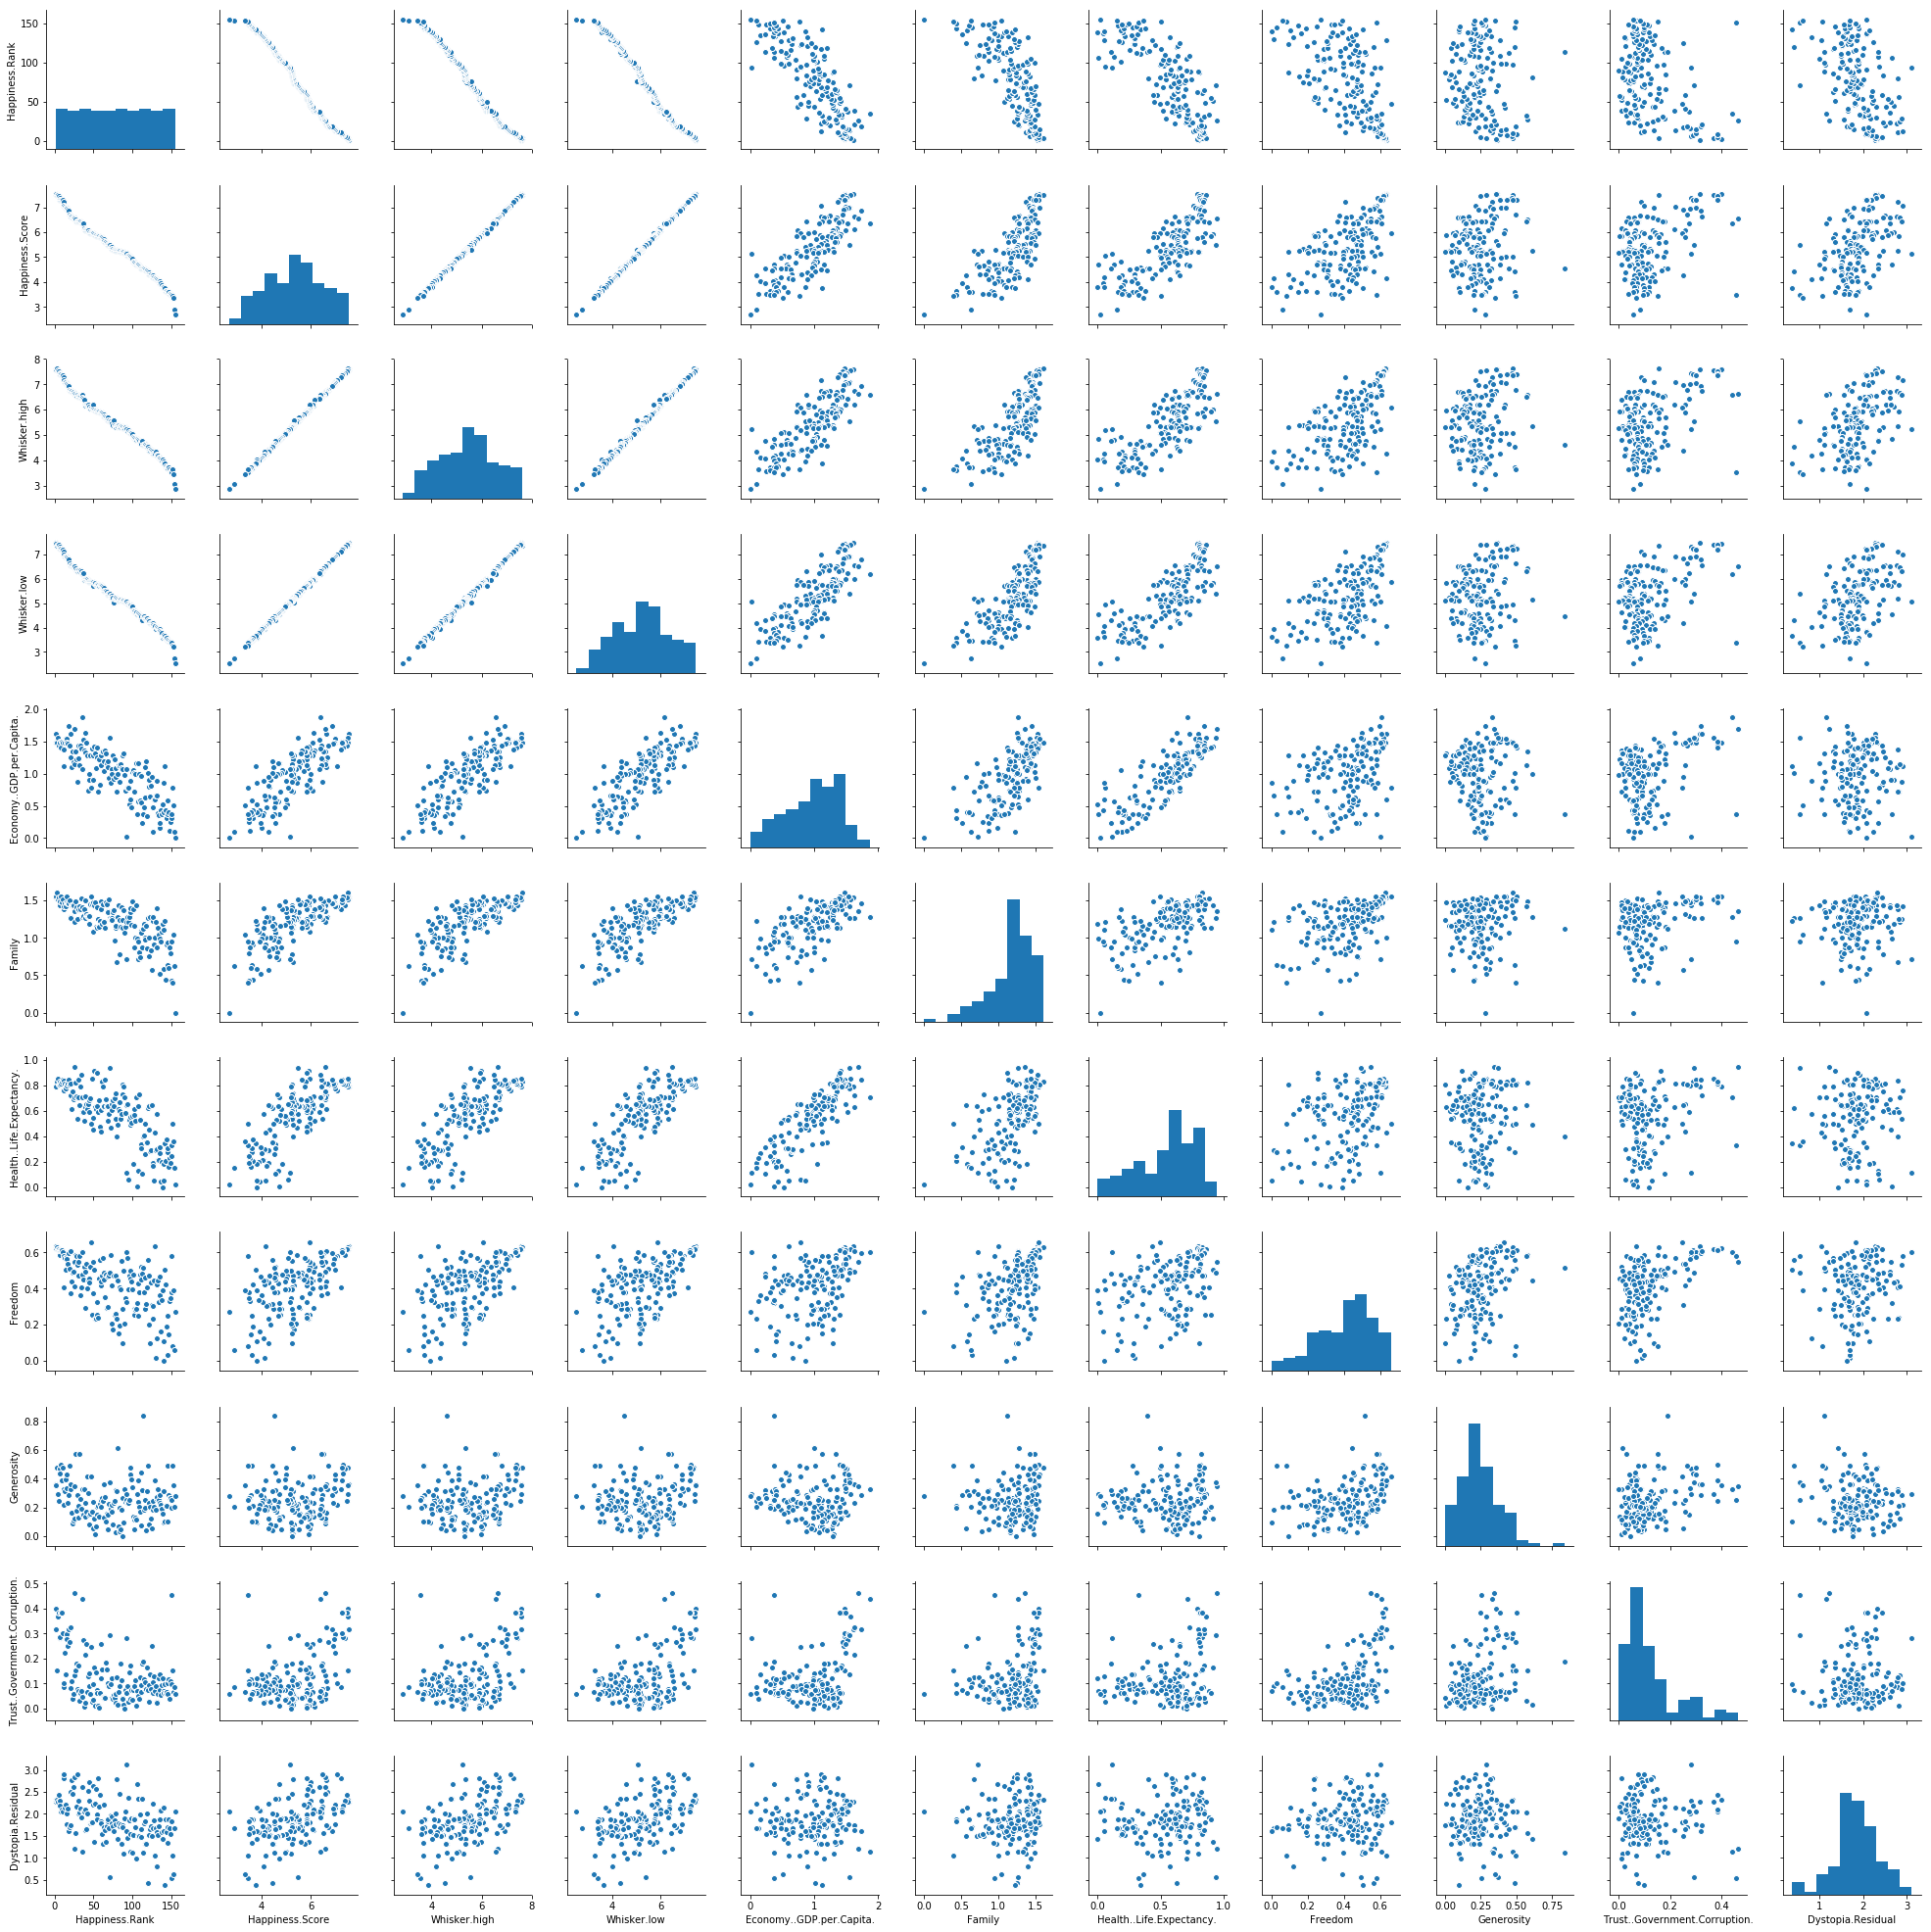

In [8]:
sns.pairplot(ano_17)

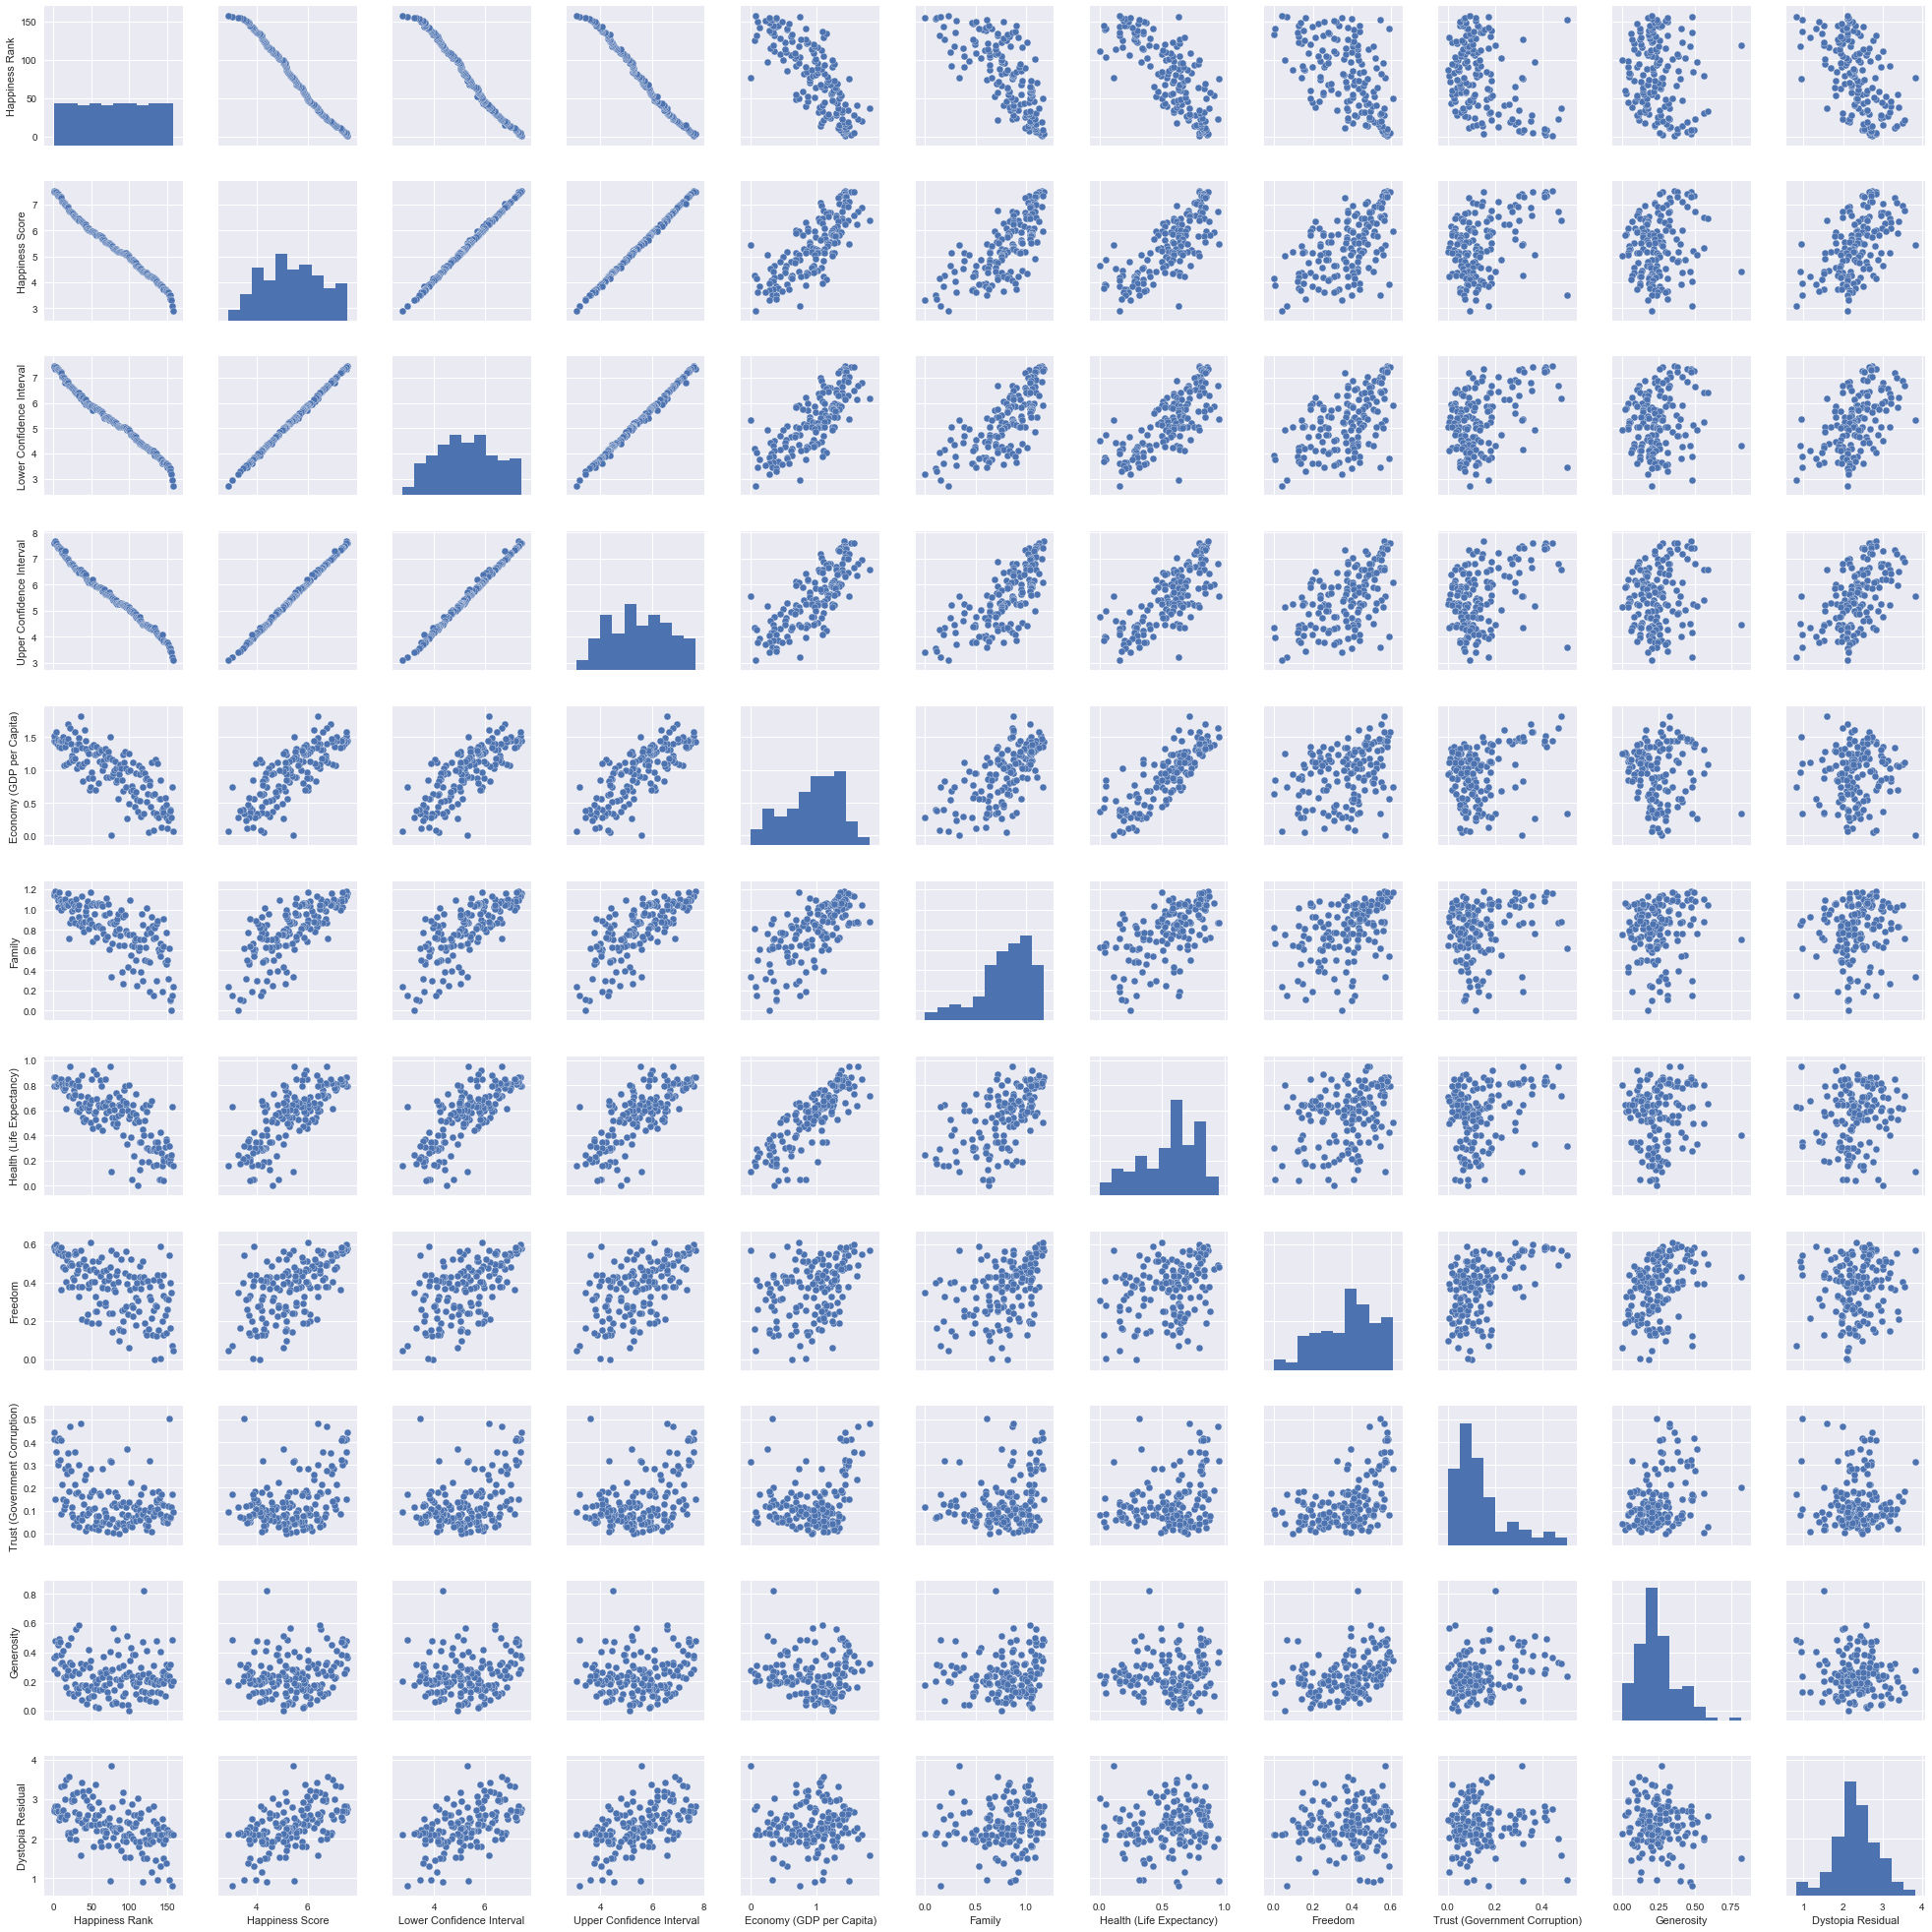

In [88]:
sns.pairplot(ano_16)

# Visualização no mapa

In [18]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = ano_17['Country'],
        locationmode = "country names",
        z = ano_17['Happiness.Rank'],
        colorbabr = {'title' : 'Ranking'
                  
                   },
      ) 

layout = dict(title = 'Ranking Felicidade 2017',
                geo = dict(showframe = False,projection = {'type':'Mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

####  Foi utilizada a biblioteca de visualização plotly que posibilita a utilzação de mapas assim como também a criação de gráficos interativos.
   #### No mapa acima parecem imdicados com cores mais claras os paises no topo do Ranking e as cores mais escuras correspondem aos paises pior ranqueados.